<a href="https://colab.research.google.com/github/mylinhpthi/mylinhpthi.github.io/blob/master/Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape
x_test.shape

(10000, 28, 28)

In [ ]:
(x_train, y_train),(x_test1, y_test) = mnist.load_data()

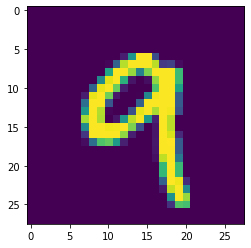

In [ ]:
plt.imshow(x_train[110])

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
# 60k to train and 10k to test

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Train sang output dang vector
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1), padding='same'))
model.add(MaxPooling2D((2,2),2))
model.add(Conv2D(32,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2),2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))


In [ ]:
model.compile('adam','categorical_crossentropy',['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2604 - accuracy: 0.9431 - val_loss: 0.0666 - val_accuracy: 0.9790
Epoch 2/3
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0760 - accuracy: 0.9772 - val_loss: 0.0628 - val_accuracy: 0.9798
Epoch 3/3
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0588 - accuracy: 0.9826 - val_loss: 0.0503 - val_accuracy: 0.9833


In [ ]:
y_hat=model.predict(x_test[99:100])
y_hat

array([[7.8983584e-09, 6.6217986e-15, 7.4725115e-09, 1.9394526e-09,
        8.8333240e-07, 5.6498478e-10, 2.3396085e-13, 5.2069521e-07,
        9.1749524e-07, 9.9999762e-01]], dtype=float32)

In [ ]:
y_label = np.argmax(y_hat,axis=1)
y_label

array([9])

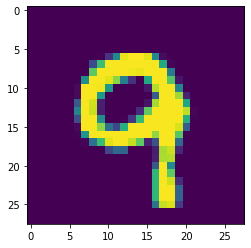

In [ ]:
plt.imshow(x_test1[99])